# CMSE 402 Pre-Class Assignment, Day10
### Mikel Good
### 2/11/2026

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
temps = pd.read_csv("temperature.csv")
det = pd.DataFrame({"datetime": temps["datetime"], "temp": temps["Detroit"]})
det = det.iloc[1:, :]
det["datetime"] = pd.to_datetime(det["datetime"])
det

,datetime,temp
1,2012-10-01 13:00:00,284.030000
2,2012-10-01 14:00:00,284.069789
3,2012-10-01 15:00:00,284.173965
4,2012-10-01 16:00:00,284.278140
5,2012-10-01 17:00:00,284.382316
...,...,...
45248,2017-11-29 20:00:00,281.250000
45249,2017-11-29 21:00:00,281.050000
45250,2017-11-29 22:00:00,280.170000
45251,2017-11-29 23:00:00,278.060000


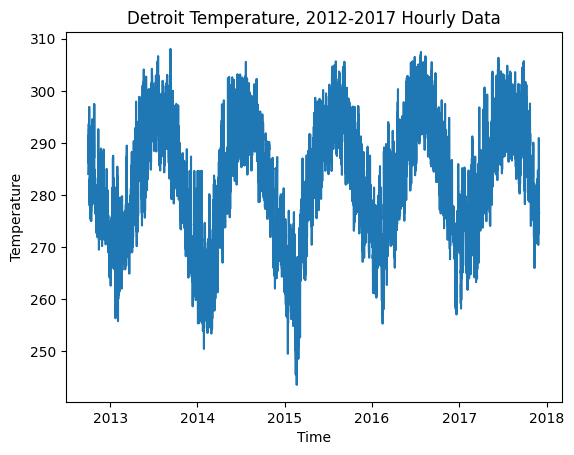

In [37]:
plt.plot(det["datetime"], det["temp"])
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("Detroit Temperature, 2012-2017 Hourly Data")
plt.show()

In [57]:
month_data = {}
curr_month_temps = []
curr_month = "10"
for row in det.iterrows():
    date = row[1]["datetime"]
    temp = row[1]["temp"]
    if str(date)[5:7] == curr_month:
        curr_month_temps.append(temp)
    else:
        curr_month = str(date)[5:7]
        month_min = np.min(curr_month_temps)
        month_max = np.max(curr_month_temps)
        month_avg = np.average(curr_month_temps)
        month_data[str(date)[:7]] = [month_min, month_max, month_avg]
        curr_month_temps = []

In [58]:
month_data

{'2012-11': [np.float64(274.98),
  np.float64(297.47),
  np.float64(284.9111181469535)],
 '2012-12': [np.float64(269.47),
  np.float64(292.63),
  np.float64(277.8632197496523)],
 '2013-01': [np.float64(264.17),
  np.float64(288.75),
  np.float64(275.98484813817896)],
 '2013-02': [np.float64(256.3),
  np.float64(287.53),
  np.float64(271.82607765814265)],
 '2013-03': [np.float64(255.75),
  np.float64(280.66),
  np.float64(269.9853659960268)],
 '2013-04': [np.float64(264.86),
  np.float64(289.48),
  np.float64(273.80764302377526)],
 '2013-05': [np.float64(268.97),
  np.float64(297.93),
  np.float64(280.0346648122392)],
 '2013-06': [np.float64(274.11),
  np.float64(304.11),
  np.float64(289.52588223418576)],
 '2013-07': [np.float64(280.9),
  np.float64(304.22),
  np.float64(293.28329107556743)],
 '2013-08': [np.float64(284.68),
  np.float64(306.67),
  np.float64(295.6359674742032)],
 '2013-09': [np.float64(284.32),
  np.float64(303.07),
  np.float64(294.38474026469174)],
 '2013-10': [np.f

In [68]:
monthly = pd.DataFrame(month_data).T
monthly.columns = ["min_temp", "max_temp", "avg_temp"]
monthly = monthly.reset_index().rename(columns={"index": "month"})
monthly["month"] = pd.to_datetime(monthly["month"])
monthly

,month,min_temp,max_temp,avg_temp
0,2012-11-01,274.98,297.47,284.911118
1,2012-12-01,269.47,292.63,277.863220
2,2013-01-01,264.17,288.75,275.984848
3,2013-02-01,256.30,287.53,271.826078
4,2013-03-01,255.75,280.66,269.985366
...,...,...,...,...
56,2017-07-01,282.84,306.35,294.293740
57,2017-08-01,286.36,304.82,295.996836
58,2017-09-01,283.04,303.60,294.153538
59,2017-10-01,280.26,305.71,291.755580


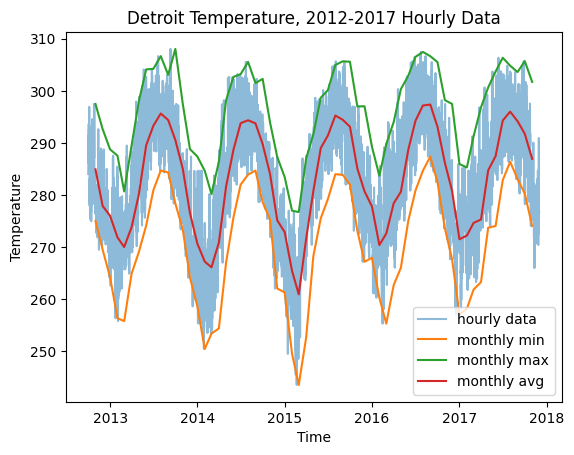

In [67]:
plt.plot(det["datetime"], det["temp"], alpha=0.5, label="hourly data")
plt.plot(monthly["month"], monthly["min_temp"], label="monthly min")
plt.plot(monthly["month"], monthly["max_temp"], label="monthly max")
plt.plot(monthly["month"], monthly["avg_temp"], label="monthly avg")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("Detroit Temperature, 2012-2017 Hourly Data")
plt.legend()
plt.show()